In [29]:
#pip install phik

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import phik
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

## 2019

In [31]:
df_2019 = pd.read_csv("df_2019.csv")

In [57]:
df_2019.shape

(19815527, 9)

In [58]:
df_2019.duplicated().value_counts()

False    19815527
dtype: int64

In [59]:
df_2019[['values', 'Point-of-Sale_ID']].head()

values Point-of-Sale_ID
0   645.0               57
1  1690.0              108
2  3495.0               77
3  1200.0              249
4  2360.0              400

In [60]:
df_2019['Point-of-Sale_ID'] = df_2019['Point-of-Sale_ID'].astype(str)

In [61]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19815527 entries, 0 to 19815526
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ProductFamily_ID    int64  
 1   ProductCategory_ID  int64  
 2   ProductBrand_ID     int64  
 3   ProductName_ID      int64  
 4   ProductPackSKU_ID   int64  
 5   Point-of-Sale_ID    object 
 6   Date                object 
 7   units               float64
 8   values              float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.3+ GB


In [62]:
valuesPOS2019 = pd.DataFrame(df_2019.groupby(['Point-of-Sale_ID']).sum()['values'])
valuesPOS2019

values
Point-of-Sale_ID              
1                 2.353339e+08
10                1.066642e+08
100               3.216756e+08
101               1.409956e+08
102               2.693290e+08
...                        ...
95                1.372869e+08
96                2.878091e+07
97                1.348662e+08
98                1.345149e+08
99                2.155715e+08

[386 rows x 1 columns]

In [68]:
valuesPOS2019.isna().sum().sum()

0

In [69]:
valuesPOS2019.describe()

values
count  3.860000e+02
mean   1.894706e+08
std    8.645835e+07
min    1.362329e+07
25%    1.290593e+08
50%    1.757456e+08
75%    2.396350e+08
max    4.988898e+08

(13623290.0, 466773400.0)

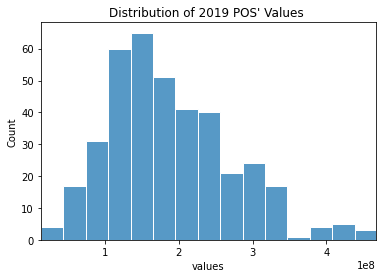

In [70]:
sns.histplot(
    valuesPOS2019, x="values", edgecolor='white')
plt.title("Distribution of 2019 POS' Values ")
plt.xlim(1.362329e+07, 4.988898e+08)

Rectangle(xy=(1.10677e+08, 0), width=3.23511e+07, height=71, angle=0)
Rectangle(xy=(2.72432e+08, 0), width=3.23511e+07, height=26, angle=0)
Rectangle(xy=(3.69485e+08, 0), width=3.23511e+07, height=3, angle=0)


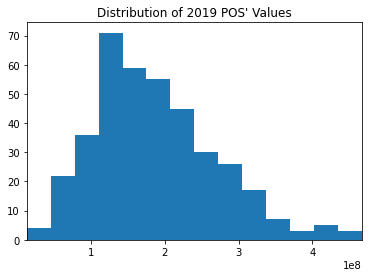

In [71]:
N, bins, patches = plt.hist(valuesPOS2019['values'], 15)

plt.title("Distribution of 2019 POS' Values")
plt.xlim(1.362329e+07, 4.988898e+08)

print(patches[3])
print(patches[8])
print(patches[11])

**CLUSTER 2019 - VALUE:** <br>
- We decided on 4 Clusters based on de describe method and the distribution of the POS' values for 2019.
- Thus, we can nominate the 4 Clusters as: 
   - Cluster 1: Bronze 
   - Cluster 2: Silver 
   - Cluster 3: Gold
   - Cluster 4: Platinum 
- Therefore each POS will belong to a certain Cluster based on the following limits of values: 
   - Bronze: Values [1.362329e+07, 1.04253e+08[
   - Silver: Values [1.04253e+08, 2.55303e+08[
   - Gold: Values [2.55303e+08, 3.45933e+08[
   - Platinum: Values[3.45933e+08, 4.988898e+08]

In [72]:
# Cluster 1 - Bronze
len(valuesPOS2019.loc[(valuesPOS2019['values'] >= 1.362329e+07) & (valuesPOS2019['values'] < 1.04253e+08)])

51

In [73]:
# Cluster 2 - Silver
len(valuesPOS2019.loc[(valuesPOS2019['values'] >= 1.04253e+08) & (valuesPOS2019['values'] < 2.55303e+08)])

258

In [74]:
# Cluster 3 - Gold
len(valuesPOS2019.loc[(valuesPOS2019['values'] >= 2.55303e+08) & (valuesPOS2019['values'] < 3.45933e+08)])

59

In [75]:
# Cluster 4 - Platinum
len(valuesPOS2019.loc[(valuesPOS2019['values'] >= 3.45933e+08)]) # 17 POS

15

In [76]:
# List of the POS that belong to Cluster Bronze
bronze2019 = np.array(valuesPOS2019.loc[(valuesPOS2019['values'] >= 1.362329e+07) & (valuesPOS2019['values'] < 1.04253e+08)].index)
bronze2019

array(['105', '124', '152', '153', '154', '157', '158', '167', '174',
       '177', '178', '183', '187', '20', '200', '220', '221', '224',
       '225', '234', '237', '243', '244', '246', '247', '248', '253',
       '289', '314', '315', '316', '317', '318', '319', '320', '326',
       '332', '336', '337', '344', '365', '366', '369', '370', '371',
       '373', '375', '376', '91', '94', '96'], dtype=object)

In [77]:
# List of the POS that belong to Cluster Silver
silver2019 = np.array(valuesPOS2019.loc[(valuesPOS2019['values'] >= 1.04253e+08) & (valuesPOS2019['values'] < 2.55303e+08)].index)
silver2019

array(['1', '10', '101', '104', '107', '108', '109', '11', '110', '111',
       '113', '114', '116', '118', '119', '12', '120', '121', '122',
       '123', '125', '126', '127', '128', '129', '13', '130', '131',
       '132', '133', '134', '135', '136', '137', '138', '139', '14',
       '140', '141', '142', '143', '144', '145', '146', '147', '148',
       '149', '15', '150', '155', '156', '159', '16', '160', '161', '162',
       '163', '164', '165', '166', '168', '169', '170', '171', '172',
       '173', '175', '176', '179', '18', '181', '182', '184', '185',
       '186', '188', '189', '19', '190', '191', '192', '193', '194',
       '195', '197', '198', '199', '2', '201', '202', '203', '204', '205',
       '206', '207', '208', '21', '211', '212', '213', '214', '216',
       '217', '218', '219', '222', '223', '226', '227', '228', '229',
       '23', '230', '231', '232', '233', '235', '236', '238', '239',
       '240', '241', '242', '245', '249', '25', '250', '255', '256',
       '258', '

In [78]:
# List of the POS that belong to Cluster Gold
gold2019 = np.array(valuesPOS2019.loc[(valuesPOS2019['values'] >= 2.55303e+08) & (valuesPOS2019['values'] < 3.45933e+08)].index)
gold2019

array(['100', '102', '106', '112', '115', '117', '151', '17', '180',
       '196', '210', '215', '22', '24', '251', '254', '257', '260', '263',
       '268', '273', '276', '277', '283', '287', '3', '30', '32', '329',
       '333', '343', '347', '348', '358', '362', '367', '382', '387',
       '389', '391', '392', '393', '398', '399', '4', '404', '405', '407',
       '410', '44', '49', '56', '57', '60', '71', '73', '8', '80', '89'],
      dtype=object)

In [79]:
# List of the POS that belong to Cluster Platinum
platinum2019 = np.array(valuesPOS2019.loc[(valuesPOS2019['values'] >= 3.45933e+08)].index)
platinum2019

array(['209', '252', '272', '282', '288', '356', '359', '360', '37',
       '383', '42', '48', '62', '72', '92'], dtype=object)

In [80]:
# conditions = [
#     (values2019['values'] >= 1.362329e+07) & (values2019['values'] < 1.04253e+08),
#     (values2019['values'] >= 1.04253e+08) & (values2019['values'] < 2.55303e+08),
#     (values2019['values'] >= 2.55303e+08) & (values2019['values'] < 3.45933e+08),
#     (values2019['values'] >= 3.45933e+08) & (values2019['values']<= 4.667734e+08)
#     ]

# values = ['1', '2', '3', '4']

# values2019['Cluster Label'] = np.select(conditions, values)
# clustersvalue2019 = values2019.copy()
# clustersvalue2019

In [81]:
d = {'Cluster Label': ['Bronze','Silver', 'Gold', 'Platinum'], 'Number of POS': [51, 258, 59, 17]}
no_culters_value_2019 = pd.DataFrame(data=d)
no_culters_value_2019

Cluster Label  Number of POS
0        Bronze             51
1        Silver            258
2          Gold             59
3      Platinum             15

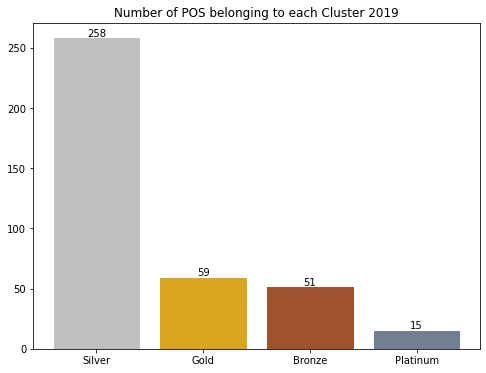

In [82]:
# sns.barplot(x="Cluster Label", y="Number of POS", data=no_culters_value_2019)
# barlist = plt.bar(no_culters_value_2019['Cluster Label'],no_culters_value_2019['Number of POS'])
no_culters_value_2019.sort_values('Number of POS',ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(no_culters_value_2019['Cluster Label'],no_culters_value_2019['Number of POS'])

bars[0].set_color('silver')
bars[1].set_color('goldenrod')
bars[2].set_color('sienna')
bars[3].set_color('slategray')

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height}', ha='center',
            va='bottom')

plt.title("Number of POS belonging to each Cluster 2019")
plt.show()

Rectangle(xy=(1.10677e+08, 0), width=3.23511e+07, height=71, angle=0)


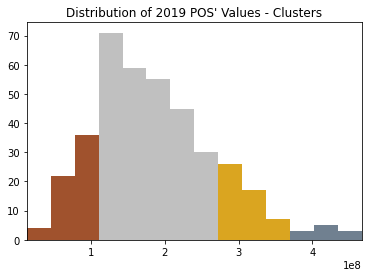

In [83]:
N, bins, patches = plt.hist(valuesPOS2019['values'], 15)

bronze = 'sienna'
silver = 'silver'
gold = 'goldenrod'
platinum = 'slategray'

print(patches[3])

for i in range(0,3):
    patches[i].set_facecolor(bronze)
for i in range(3,8):
    patches[i].set_facecolor(silver)
for i in range(8,11):
    patches[i].set_facecolor(gold)
for i in range(11,15):
    patches[i].set_facecolor(platinum)

plt.title("Distribution of 2019 POS' Values - Clusters")
plt.xlim(1.362329e+07, 4.667734e+08)

plt.show()

## Load the Dataset

In [85]:
inicio_analise = pd.read_csv("inicio_analise.csv")

## 2018

In [86]:
df_2018 = inicio_analise.loc[(inicio_analise['Date'] > '2017-12-31') & (inicio_analise['Date'] < '2019-01-01')]
df_2018.head()

ProductFamily_ID  ProductCategory_ID  ProductBrand_ID  \
43504371                12                 178             1405   
43504372                21                  62             1160   
43504373                14                  27             1266   
43504374                14                  27             1266   
43504375                17                  27              655   

          ProductName_ID  ProductPackSKU_ID  Point-of-Sale_ID        Date  \
43504371            2602               7954                 8  2018-01-01   
43504372            2166               6558               287  2018-01-01   
43504373            2372               7302                48  2018-01-01   
43504374            2372               7302               219  2018-01-01   
43504375            1289               3888               137  2018-01-01   

          units  values  
43504371    1.0  1852.0  
43504372    1.0  1527.0  
43504373    5.0  3225.0  
43504374    3.0  1939.0  
43504375    1.0   977.0

In [87]:
df_2018.shape

(22841579, 9)

In [88]:
df_2018.duplicated().value_counts()

False    22841579
dtype: int64

In [89]:
df_2018['Point-of-Sale_ID'] = df_2018['Point-of-Sale_ID'].astype(str)

<ipython-input-89-fd802f7be6a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Point-of-Sale_ID'] = df_2018['Point-of-Sale_ID'].astype(str)


In [90]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22841579 entries, 43504371 to 66345949
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ProductFamily_ID    int64  
 1   ProductCategory_ID  int64  
 2   ProductBrand_ID     int64  
 3   ProductName_ID      int64  
 4   ProductPackSKU_ID   int64  
 5   Point-of-Sale_ID    object 
 6   Date                object 
 7   units               float64
 8   values              float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.7+ GB


In [91]:
valuesPOS2018 = pd.DataFrame(df_2018.groupby(['Point-of-Sale_ID']).sum()['values'])
valuesPOS2018

values
Point-of-Sale_ID              
1                 2.646254e+08
10                1.171737e+08
100               3.586538e+08
101               1.583938e+08
102               3.115492e+08
...                        ...
95                1.624128e+08
96                1.094809e+08
97                7.356203e+07
98                1.495960e+08
99                2.344843e+08

[386 rows x 1 columns]

In [92]:
valuesPOS2018.describe()

values
count  3.860000e+02
mean   2.116104e+08
std    9.487456e+07
min    1.566165e+07
25%    1.437304e+08
50%    1.960343e+08
75%    2.656503e+08
max    5.463459e+08

In [96]:
valuesPOS2018.isna().sum().sum()

0

(15661650.0, 478137300.0)

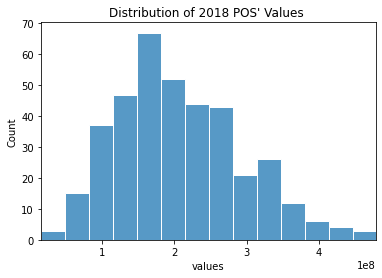

In [99]:
sns.histplot(
    valuesPOS2018, x="values", edgecolor='white')
plt.title("Distribution of 2018 POS' Values ")
plt.xlim(1.566165e+07, 5.463459e+08)

Rectangle(xy=(1.67286e+08, 0), width=3.7906e+07, height=57, angle=0)
Rectangle(xy=(3.1891e+08, 0), width=3.7906e+07, height=28, angle=0)
Rectangle(xy=(4.32628e+08, 0), width=3.7906e+07, height=5, angle=0)


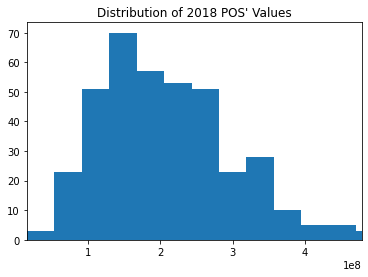

In [100]:
N, bins, patches = plt.hist(valuesPOS2018['values'], 14)

plt.title("Distribution of 2018 POS' Values")
plt.xlim(1.566165e+07, 5.463459e+08)

print(patches[4])
print(patches[8])
print(patches[11])

**CLUSTER 2018 - VALUE:** <br>
- We decided on 4 Clusters based on de describe method and the distribution of the POS' values for 2018.
- Thus, we can nominate the 4 Clusters as: 
   - Cluster 1: Bronze 
   - Cluster 2: Silver 
   - Cluster 3: Gold
   - Cluster 4: Platinum 
- Therefore each POS will belong to a certain Cluster based on the following limits of values: 
   - Bronze: Values [1.566165e+07, 1.47798e+08[
   - Silver: Values [1.47798e+08, 2.79933e+08[
   - Gold: Values [2.79933e+08, 3.79035e+08[
   - Platinum: Values[3.79035e+08, 5.463459e+08]

In [101]:
# Cluster 1 - Bronze
len(valuesPOS2018.loc[(valuesPOS2018['values'] >= 1.566165e+07) & (valuesPOS2018['values'] < 1.47798e+08)])

101

In [102]:
# Cluster 2 - Silver
len(valuesPOS2018.loc[(valuesPOS2018['values'] >= 1.47798e+08) & (valuesPOS2018['values'] <  2.79933e+08)])

203

In [103]:
# Cluster 3 - Gold
len(valuesPOS2018.loc[(valuesPOS2018['values'] >=  2.79933e+08) & (valuesPOS2018['values'] < 3.79035e+08)])

61

In [104]:
# Cluster 4 - Platinum
len(valuesPOS2018.loc[(valuesPOS2018['values'] >= 3.79035e+08)]) # -> 19 POS

13

In [105]:
# List of the POS that belong to Cluster Bronze
bronze2018 = np.array(valuesPOS2018.loc[(valuesPOS2018['values'] >= 3.45933e+08) & (valuesPOS2018['values'] < 4.667734e+08)].index)
bronze2018

array(['100', '117', '209', '210', '252', '254', '260', '277', '287',
       '333', '347', '356', '359', '360', '362', '37', '387', '389',
       '399', '404', '407', '42', '48', '62', '72', '73'], dtype=object)

In [106]:
# List of the POS that belong to Cluster Silver
silver2018 = np.array(valuesPOS2018.loc[(valuesPOS2018['values'] >= 3.45933e+08) & (valuesPOS2018['values'] < 4.667734e+08)].index)
silver2018

array(['100', '117', '209', '210', '252', '254', '260', '277', '287',
       '333', '347', '356', '359', '360', '362', '37', '387', '389',
       '399', '404', '407', '42', '48', '62', '72', '73'], dtype=object)

In [107]:
# List of the POS that belong to Cluster Gold
gold2018 = np.array(valuesPOS2018.loc[(valuesPOS2018['values'] >= 3.45933e+08) & (valuesPOS2018['values'] < 4.667734e+08)].index)
gold2018

array(['100', '117', '209', '210', '252', '254', '260', '277', '287',
       '333', '347', '356', '359', '360', '362', '37', '387', '389',
       '399', '404', '407', '42', '48', '62', '72', '73'], dtype=object)

In [108]:
# List of the POS that belong to Cluster Platinum
platinum2018 = np.array(valuesPOS2018.loc[(valuesPOS2018['values'] >= 3.45933e+08)].index)
platinum2018

array(['100', '117', '209', '210', '252', '254', '260', '277', '287',
       '333', '347', '356', '359', '360', '362', '37', '387', '389',
       '399', '404', '407', '42', '48', '62', '72', '73'], dtype=object)

In [109]:
# conditions = [
#     (values2018['values'] >= 1.566165e+07) & (values2018['values'] < 1.47798e+08),
#     (values2018['values'] >= 1.47798e+08) & (values2018['values'] < 2.79933e+08),
#     (values2018['values'] >= 2.79933e+08) & (values2018['values'] < 3.79035e+08),
#     (values2018['values'] >= 3.79035e+08) & (values2018['values']<= 4.781373e+08)
#     ]

# values = ['1', '2', '3', '4']

# values2018['Cluster Label'] = np.select(conditions, values)
# clustersvalue2018 = values2018.copy()
# clustersvalue2018

In [110]:
d = {'Cluster Label': ['Bronze','Silver', 'Gold', 'Platinum'], 'Number of POS': [101, 203, 61, 19]}
no_culters_value_2018 = pd.DataFrame(data=d)
no_culters_value_2018

Cluster Label  Number of POS
0        Bronze            101
1        Silver            203
2          Gold             61
3      Platinum             13

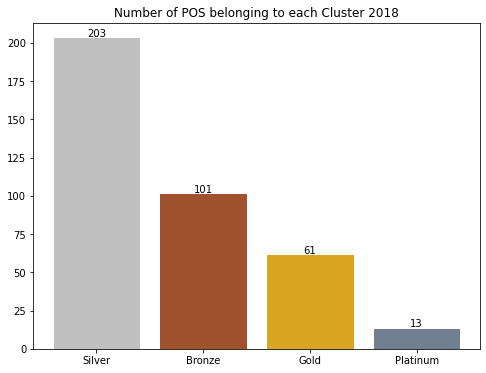

In [111]:
# sns.barplot(x="Cluster Label", y="Number of POS", data=no_culters_value_2019)
# barlist = plt.bar(no_culters_value_2019['Cluster Label'],no_culters_value_2019['Number of POS'])
no_culters_value_2018.sort_values('Number of POS',ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(no_culters_value_2018['Cluster Label'], no_culters_value_2018['Number of POS'])

bars[0].set_color('silver')
bars[1].set_color('sienna')
bars[2].set_color('goldenrod')
bars[3].set_color('slategray')

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height}', ha='center',
            va='bottom')

plt.title("Number of POS belonging to each Cluster 2018")
plt.show()

In [112]:
N, bins, patches = plt.hist(valuesPOS2018['values'], 14)

bronze = 'sienna'
silver = 'silver'
gold = 'goldenrod'
platinum = 'slategray'

print(patches[3])

for i in range(0,4):
    patches[i].set_facecolor(bronze)
for i in range(4,8):
    patches[i].set_facecolor(silver)
for i in range(8,11):
    patches[i].set_facecolor(gold)
for i in range(11,14):
    patches[i].set_facecolor(platinum)

plt.title("Distribution of 2018 POS' Values - Clusters")
plt.xlim(1.566165e+07, 4.781373e+08)

plt.show()

Rectangle(xy=(1.2938e+08, 0), width=3.7906e+07, height=70, angle=0)


# 2017

In [113]:
df_2017 = inicio_analise.loc[(inicio_analise['Date'] > '2016-12-31') & (inicio_analise['Date'] < '2018-01-01')]
df_2017.head()

ProductFamily_ID  ProductCategory_ID  ProductBrand_ID  \
21679711                16                  13              181   
21679712                14                  27              226   
21679713                15                   1              781   
21679714                 1                 178              978   
21679715                18                 175                5   

          ProductName_ID  ProductPackSKU_ID  Point-of-Sale_ID        Date  \
21679711             354               1179                62  2017-01-01   
21679712             481               1572               406  2017-01-01   
21679713            1517               4628                33  2017-01-01   
21679714            1839               5568                11  2017-01-01   
21679715              21                 57               240  2017-01-01   

          units  values  
21679711    1.0   850.0  
21679712    4.0  2960.0  
21679713    2.0  1530.0  
21679714    1.0  1391.0  
21679715    1.0  1829.0

In [114]:
df_2017.shape

(21824660, 9)

In [115]:
df_2017.duplicated().value_counts()

False    21824660
dtype: int64

In [116]:
df_2017['values'] = df_2017['values'].loc[df_2017['values'] > 0]

<ipython-input-116-d82bf8cc4569>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['values'] = df_2017['values'].loc[df_2017['values'] > 0]


In [117]:
df_2017.shape

(21824660, 9)

In [118]:
df_2017['Point-of-Sale_ID'] = df_2017['Point-of-Sale_ID'].astype(str)

<ipython-input-118-8bdf9416cf31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Point-of-Sale_ID'] = df_2017['Point-of-Sale_ID'].astype(str)


In [119]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21824660 entries, 21679711 to 43504370
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ProductFamily_ID    int64  
 1   ProductCategory_ID  int64  
 2   ProductBrand_ID     int64  
 3   ProductName_ID      int64  
 4   ProductPackSKU_ID   int64  
 5   Point-of-Sale_ID    object 
 6   Date                object 
 7   units               float64
 8   values              float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.6+ GB


In [120]:
valuesPOS2017 = pd.DataFrame(df_2017.groupby(['Point-of-Sale_ID']).sum()['values'])
valuesPOS2017

values
Point-of-Sale_ID              
1                 2.432032e+08
10                1.054177e+08
100               3.253501e+08
101               1.483361e+08
102               2.900499e+08
...                        ...
95                1.578010e+08
96                1.028752e+08
97                7.212335e+07
98                1.380023e+08
99                2.139055e+08

[386 rows x 1 columns]

In [121]:
valuesPOS2017.describe()

values
count  3.860000e+02
mean   1.970621e+08
std    8.738244e+07
min    1.690277e+07
25%    1.340474e+08
50%    1.839527e+08
75%    2.480693e+08
max    5.472368e+08

In [122]:
valuesPOS2017.isna().sum().sum()

0

In [124]:
sns.histplot(
    valuesPOS2017, x="values", edgecolor='white')
plt.title("Distribution of 2017 POS' Values ")
plt.xlim(1.690277e+07, 5.472368e+08)

(16902770.0, 506107900.0)

Rectangle(xy=(1.1634e+08, 0), width=3.31459e+07, height=66, angle=0)
Rectangle(xy=(2.8207e+08, 0), width=3.31459e+07, height=26, angle=0)
Rectangle(xy=(4.14653e+08, 0), width=3.31459e+07, height=3, angle=0)


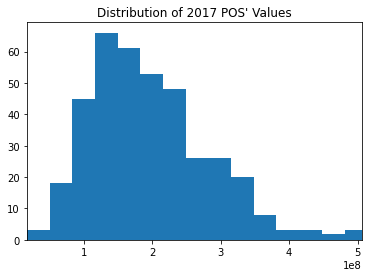

In [125]:
N, bins, patches = plt.hist(valuesPOS2017['values'], 16)

plt.title("Distribution of 2017 POS' Values")
plt.xlim(1.690277e+07, 5.472368e+08)

print(patches[3])
print(patches[8])
print(patches[12])

**CLUSTER 2017 - VALUE:** <br>
- We decided on 4 Clusters based on de describe method and the distribution of the POS' values for 2017.
- Thus, we can nominate the 4 Clusters as: 
   - Cluster 1: Bronze 
   - Cluster 2: Silver 
   - Cluster 3: Gold
   - Cluster 4: Platinum 
- Therefore each POS will belong to a certain Cluster based on the following limits of values: 
   - Bronze: Values [1.690277e+07, 1.08629e+08[
   - Silver: Values [1.08629e+08, 2.61505e+08[
   - Gold: Values [2.61505e+08, 3.53231e+08[
   - Platinum: Values[3.53231e+08, 5.472368e+08]

In [126]:
# Cluster 1 - Bronze
len(valuesPOS2017.loc[(valuesPOS2017['values'] >= 1.690277e+07) & (valuesPOS2017['values'] < 1.08629e+08)])

49

In [127]:
# Cluster 2 - Silver
len(valuesPOS2017.loc[(valuesPOS2017['values'] >= 1.08629e+08) & (valuesPOS2017['values'] <  2.61505e+08)])

258

In [128]:
# Cluster 3 - Gold
len(valuesPOS2017.loc[(valuesPOS2017['values'] >=  2.61505e+08) & (valuesPOS2017['values'] < 3.83807e+08)])

67

In [129]:
# Cluster 4 - Platinum
len(valuesPOS2017.loc[(valuesPOS2017['values'] >= 3.83807e+08)]) # -> 11 POS

10

In [130]:
# List of the POS that belong to Cluster Bronze
bronze2017 = np.array(valuesPOS2017.loc[(valuesPOS2017['values'] >= 1.690277e+07) & (valuesPOS2017['values'] < 1.08629e+08)].index)
bronze2017

array(['10', '105', '124', '134', '152', '153', '154', '157', '158',
       '167', '174', '177', '178', '183', '187', '20', '200', '220',
       '221', '224', '225', '234', '237', '243', '247', '253', '259',
       '289', '315', '316', '317', '319', '320', '326', '332', '336',
       '337', '344', '365', '366', '369', '370', '373', '375', '376',
       '91', '94', '96', '97'], dtype=object)

In [131]:
# List of the POS that belong to Cluster Silver
silver2017 = np.array(valuesPOS2017.loc[(valuesPOS2017['values'] >= 1.08629e+08) & (valuesPOS2017['values'] <  2.61505e+08)].index)
silver2017

array(['1', '101', '104', '107', '108', '109', '11', '110', '111', '113',
       '114', '115', '116', '118', '119', '12', '120', '121', '122',
       '123', '125', '126', '127', '128', '129', '130', '132', '133',
       '135', '137', '138', '139', '14', '140', '141', '142', '143',
       '144', '145', '146', '147', '148', '149', '15', '150', '155',
       '156', '159', '16', '160', '162', '163', '164', '165', '166',
       '168', '169', '170', '171', '172', '173', '175', '176', '179',
       '18', '181', '182', '184', '185', '186', '188', '189', '19', '190',
       '191', '192', '193', '194', '195', '197', '198', '199', '2', '201',
       '202', '203', '204', '205', '206', '207', '208', '21', '211',
       '212', '213', '214', '216', '217', '218', '219', '22', '222',
       '223', '226', '227', '228', '229', '23', '230', '231', '232',
       '233', '236', '238', '239', '240', '241', '242', '244', '245',
       '246', '248', '249', '25', '250', '255', '256', '258', '26', '261',
       '

In [132]:
# List of the POS that belong to Cluster Gold
gold2017 = np.array(valuesPOS2017.loc[(valuesPOS2017['values'] >=  2.61505e+08) & (valuesPOS2017['values'] < 3.83807e+08)].index)
gold2017

array(['100', '102', '106', '112', '117', '13', '131', '136', '151',
       '161', '17', '180', '196', '209', '210', '215', '235', '24', '251',
       '252', '254', '257', '260', '268', '273', '276', '277', '283',
       '287', '288', '3', '32', '323', '324', '329', '333', '347', '348',
       '358', '362', '367', '37', '382', '387', '388', '389', '391',
       '392', '393', '398', '399', '4', '404', '405', '407', '410', '42',
       '48', '49', '56', '57', '60', '62', '65', '73', '8', '80'],
      dtype=object)

In [133]:
# List of the POS that belong to Cluster PLatinum
platinum2017 = np.array(valuesPOS2017.loc[(valuesPOS2017['values'] >= 3.83807e+08)].index)
platinum2017

array(['103', '272', '280', '282', '356', '359', '360', '383', '72', '78'],
      dtype=object)

In [134]:
d = {'Cluster Label': ['Bronze','Silver', 'Gold', 'Platinum'], 'Number of POS': [49, 258, 67, 11]}
no_culters_value_2017 = pd.DataFrame(data=d)
no_culters_value_2017

Cluster Label  Number of POS
0        Bronze             49
1        Silver            258
2          Gold             67
3      Platinum             10

In [135]:
# sns.barplot(x="Cluster Label", y="Number of POS", data=no_culters_value_2019)
# barlist = plt.bar(no_culters_value_2019['Cluster Label'],no_culters_value_2019['Number of POS'])
no_culters_value_2017.sort_values('Number of POS',ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(no_culters_value_2017['Cluster Label'], no_culters_value_2017['Number of POS'])

bars[0].set_color('silver')
bars[1].set_color('goldenrod')
bars[2].set_color('sienna')
bars[3].set_color('slategray')

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height}', ha='center',
            va='bottom')

plt.title("Number of POS belonging to each Cluster 2017")
plt.savefig('NoPOSClusters2017.png', transparent=True)
plt.show()

In [136]:
N, bins, patches = plt.hist(valuesPOS2017['values'], 16)

bronze = 'sienna'
silver = 'silver'
gold = 'goldenrod'
platinum = 'slategray'

print(patches[3])

for i in range(0,3):
    patches[i].set_facecolor(bronze)
for i in range(3,8):
    patches[i].set_facecolor(silver)
for i in range(8,12):
    patches[i].set_facecolor(gold)
for i in range(12,16):
    patches[i].set_facecolor(platinum)

plt.title("Distribution of 2017 POS' Values - Clusters")
plt.xlim(1.690277e+07, 5.061079e+08)
plt.savefig('Dis2017Clusters2017.png', transparent=True)
plt.show()

Rectangle(xy=(1.1634e+08, 0), width=3.31459e+07, height=66, angle=0)


## 2016

In [137]:
df_2016 = inicio_analise.loc[(inicio_analise['Date'] > '2015-12-31') & (inicio_analise['Date'] < '2017-01-01')]
df_2016.head()

ProductFamily_ID  ProductCategory_ID  ProductBrand_ID  ProductName_ID  \
0                 1                  33             1092            2008   
1                21                  22             1425            2665   
2                21                 122              779            1514   
3                14                  27              226             481   
4                16                  11              950            1807   

   ProductPackSKU_ID  Point-of-Sale_ID        Date  units  values  
0               6099               240  2016-01-01    1.0   450.0  
1               8218               123  2016-01-01    3.0  2580.0  
2               4620               282  2016-01-01    1.0  7899.0  
3               1572               110  2016-01-01    4.0  2510.0  
4               5457                78  2016-01-01    1.0   780.0

In [138]:
df_2016.shape

(21679711, 9)

In [139]:
df_2016.duplicated().value_counts()

False    21679711
dtype: int64

In [140]:
df_2016['values'] = df_2016['values'].loc[df_2016['values'] > 0]

<ipython-input-140-3aa4aa16b854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['values'] = df_2016['values'].loc[df_2016['values'] > 0]


In [141]:
df_2016.shape

(21679711, 9)

In [142]:
df_2016['Point-of-Sale_ID'] = df_2016['Point-of-Sale_ID'].astype(str)

<ipython-input-142-efcd83cbaa82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['Point-of-Sale_ID'] = df_2016['Point-of-Sale_ID'].astype(str)


In [143]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21679711 entries, 0 to 21679710
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ProductFamily_ID    int64  
 1   ProductCategory_ID  int64  
 2   ProductBrand_ID     int64  
 3   ProductName_ID      int64  
 4   ProductPackSKU_ID   int64  
 5   Point-of-Sale_ID    object 
 6   Date                object 
 7   units               float64
 8   values              float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.6+ GB


In [144]:
valuesPOS2016 = pd.DataFrame(df_2016.groupby(['Point-of-Sale_ID']).sum()['values'])
valuesPOS2016

values
Point-of-Sale_ID              
1                 2.354069e+08
10                9.650287e+07
100               3.036300e+08
101               1.377757e+08
102               2.766958e+08
...                        ...
95                1.505970e+08
96                1.097445e+08
97                8.187975e+07
98                1.267090e+08
99                1.889064e+08

[386 rows x 1 columns]

In [145]:
valuesPOS2016.describe()

values
count  3.860000e+02
mean   1.879795e+08
std    8.247139e+07
min    1.330377e+07
25%    1.263890e+08
50%    1.740835e+08
75%    2.387395e+08
max    5.298734e+08

(13303770.0, 456735200.0)

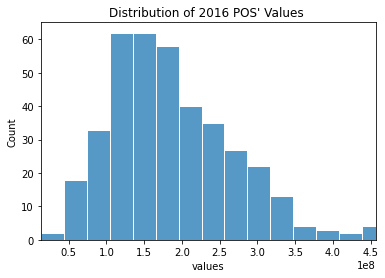

In [146]:
sns.histplot(
    valuesPOS2016, x="values", edgecolor='white')
plt.title("Distribution of 2016 POS' Values ")
plt.xlim(1.330377e+07, 5.298734e+08)

Rectangle(xy=(1.51056e+08, 0), width=3.4438e+07, height=61, angle=0)
Rectangle(xy=(2.88808e+08, 0), width=3.4438e+07, height=27, angle=0)
Rectangle(xy=(4.26559e+08, 0), width=3.4438e+07, height=5, angle=0)


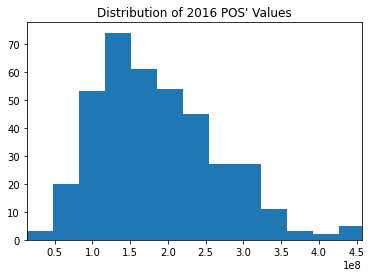

In [147]:
N, bins, patches = plt.hist(valuesPOS2016['values'], 15)

plt.title("Distribution of 2016 POS' Values")
plt.xlim(1.330377e+07, 5.298734e+08)

print(patches[4])
print(patches[8])
print(patches[12])

**CLUSTER 2016 - VALUE:** <br>
- We decided on 4 Clusters based on de describe method and the distribution of the POS' values for 2016.
- Thus, we can nominate the 4 Clusters as: 
   - Cluster 1: Bronze 
   - Cluster 2: Silver 
   - Cluster 3: Gold
   - Cluster 4: Platinum 
- Therefore each POS will belong to a certain Cluster based on the following limits of values: 
   - Bronze: Values [1.330377e+07, 1.31552e+08[
   - Silver: Values [1.31552e+08, 2.49801e+08[
   - Gold: Values [2.49801e+08, 3.68049e+08[
   - Platinum: Values[3.68049e+08, 5.298734e+08]

In [148]:
# Cluster 1 - Bronze
len(valuesPOS2016.loc[(valuesPOS2016['values'] >= 1.330377e+07) & (valuesPOS2016['values'] < 1.31552e+08)])

109

In [149]:
# Cluster 2 - Silver
len(valuesPOS2016.loc[(valuesPOS2016['values'] >= 1.31552e+08) & (valuesPOS2016['values'] <   2.49801e+08)])

193

In [150]:
# Cluster 3 - Gold
len(valuesPOS2016.loc[(valuesPOS2016['values'] >= 2.49801e+08) & (valuesPOS2016['values'] < 3.68049e+08)])

74

In [151]:
# Cluster 4 - Platinum
len(valuesPOS2016.loc[(valuesPOS2016['values'] >= 3.68049e+08)]) # -> 9 POS

8

In [152]:
# List of the POS that belong to Cluster Bronze
bronze2016 = np.array(valuesPOS2016.loc[(valuesPOS2016['values'] >= 1.330377e+07) & (valuesPOS2016['values'] < 1.31552e+08)].index)
bronze2016

array(['10', '105', '108', '121', '124', '127', '129', '134', '143',
       '145', '152', '153', '154', '155', '157', '158', '164', '167',
       '169', '171', '173', '174', '177', '178', '179', '183', '186',
       '187', '189', '191', '195', '197', '199', '20', '200', '202',
       '203', '205', '211', '214', '220', '221', '222', '224', '225',
       '228', '229', '230', '234', '236', '237', '243', '244', '246',
       '247', '248', '253', '259', '261', '28', '289', '31', '314', '315',
       '316', '317', '318', '319', '320', '326', '328', '33', '330',
       '332', '335', '336', '337', '344', '354', '363', '365', '366',
       '369', '370', '371', '373', '375', '376', '377', '378', '38',
       '384', '386', '39', '395', '403', '46', '47', '55', '68', '7',
       '70', '81', '88', '91', '94', '96', '97', '98'], dtype=object)

In [153]:
# List of the POS that belong to Cluster Silver
silver2016 = np.array(valuesPOS2016.loc[(valuesPOS2016['values'] >= 1.31552e+08) & (valuesPOS2016['values'] <   2.49801e+08)].index)
silver2016

array(['1', '101', '104', '107', '109', '11', '110', '111', '113', '114',
       '115', '116', '118', '119', '12', '120', '122', '123', '125',
       '126', '128', '130', '132', '133', '137', '138', '139', '14',
       '140', '141', '142', '144', '146', '147', '148', '149', '15',
       '150', '156', '159', '16', '160', '162', '163', '165', '166',
       '168', '170', '172', '175', '176', '18', '181', '182', '184',
       '185', '188', '19', '190', '192', '194', '198', '2', '201', '204',
       '206', '207', '208', '21', '212', '213', '216', '217', '218',
       '219', '22', '223', '226', '227', '23', '231', '232', '233', '238',
       '239', '240', '241', '242', '245', '249', '25', '255', '256',
       '258', '26', '262', '263', '264', '265', '266', '267', '269', '27',
       '270', '271', '274', '275', '278', '279', '281', '284', '285',
       '286', '29', '3', '30', '321', '322', '325', '327', '331', '338',
       '339', '34', '340', '341', '342', '343', '345', '346', '349', '35',
 

In [154]:
# List of the POS that belong to Cluster Gold
gold2016 = np.array(valuesPOS2016.loc[(valuesPOS2016['values'] >= 2.49801e+08) & (valuesPOS2016['values'] < 3.68049e+08)].index)
gold2016

array(['100', '102', '106', '112', '117', '13', '131', '135', '136',
       '151', '161', '17', '180', '193', '196', '209', '210', '215',
       '235', '24', '250', '251', '252', '254', '257', '260', '268',
       '273', '276', '277', '283', '287', '288', '32', '323', '324',
       '329', '333', '334', '347', '348', '356', '358', '362', '367',
       '37', '382', '387', '388', '389', '390', '391', '392', '393',
       '398', '399', '4', '404', '405', '407', '410', '42', '48', '49',
       '56', '57', '60', '62', '64', '65', '71', '73', '8', '80'],
      dtype=object)

In [155]:
# List of the POS that belong to Cluster PLatinum
platinum2016 = np.array(valuesPOS2016.loc[(valuesPOS2016['values'] >= 3.68049e+08)].index)
platinum2016

array(['103', '272', '282', '359', '360', '383', '72', '78'], dtype=object)

In [156]:
d = {'Cluster Label': ['Bronze','Silver', 'Gold', 'Platinum'], 'Number of POS': [109, 193, 74, 9]}
no_culters_value_2016 = pd.DataFrame(data=d)
no_culters_value_2016

Cluster Label  Number of POS
0        Bronze            109
1        Silver            193
2          Gold             74
3      Platinum              8

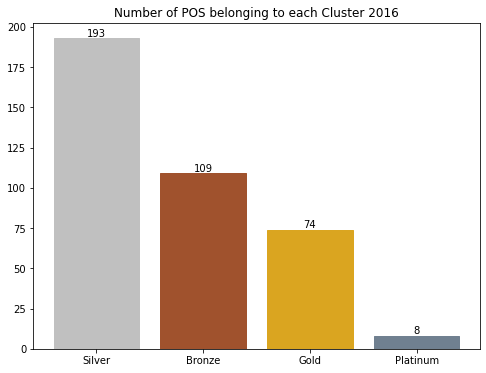

In [157]:
# sns.barplot(x="Cluster Label", y="Number of POS", data=no_culters_value_2019)
# barlist = plt.bar(no_culters_value_2019['Cluster Label'],no_culters_value_2019['Number of POS'])
no_culters_value_2016.sort_values('Number of POS',ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(no_culters_value_2016['Cluster Label'], no_culters_value_2016['Number of POS'])

bars[0].set_color('silver')
bars[1].set_color('sienna')
bars[2].set_color('goldenrod')
bars[3].set_color('slategray')

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height}', ha='center',
            va='bottom')

plt.title("Number of POS belonging to each Cluster 2016")
plt.savefig('NoPOSClusters2016.png', transparent=True)
plt.show()

Rectangle(xy=(1.16618e+08, 0), width=3.4438e+07, height=74, angle=0)


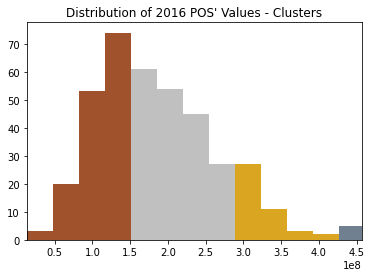

In [158]:
N, bins, patches = plt.hist(valuesPOS2016['values'], 15)

bronze = 'sienna'
silver = 'silver'
gold = 'goldenrod'
platinum = 'slategray'

print(patches[3])

for i in range(0,4):
    patches[i].set_facecolor(bronze)
for i in range(4,8):
    patches[i].set_facecolor(silver)
for i in range(8,12):
    patches[i].set_facecolor(gold)
for i in range(12,15):
    patches[i].set_facecolor(platinum)

plt.title("Distribution of 2016 POS' Values - Clusters")
plt.xlim(1.330377e+07, 4.567352e+08)

plt.savefig('Dist2016POSValues.png', transparent=True)
plt.show()

## CLUSTERS MOVEMENTS

In [160]:
conditions2019 = [
    (valuesPOS2019['values'] >= 1.362329e+07) & (valuesPOS2019['values'] < 1.04253e+08),
    (valuesPOS2019['values'] >= 1.04253e+08) & (valuesPOS2019['values'] < 2.55303e+08),
    (valuesPOS2019['values'] >= 2.55303e+08) & (valuesPOS2019['values'] < 3.45933e+08),
    (valuesPOS2019['values'] >= 3.45933e+08)
    ]

values = ['1', '2', '3', '4']

valuesPOS2019['Cluster Label'] = np.select(conditions2019, values)
clustersvalue2019 = valuesPOS2019.copy()
clustersvalue2019

values Cluster Label
Point-of-Sale_ID                            
1                 2.353339e+08             2
10                1.066642e+08             2
100               3.216756e+08             3
101               1.409956e+08             2
102               2.693290e+08             3
...                        ...           ...
95                1.372869e+08             2
96                2.878091e+07             1
97                1.348662e+08             2
98                1.345149e+08             2
99                2.155715e+08             2

[386 rows x 2 columns]

In [161]:
conditions2018 = [
    (valuesPOS2018['values'] >= 1.566165e+07) & (valuesPOS2018['values'] < 1.47798e+08),
    (valuesPOS2018['values'] >= 1.47798e+08) & (valuesPOS2018['values'] < 2.79933e+08),
    (valuesPOS2018['values'] >= 2.79933e+08) & (valuesPOS2018['values'] < 3.79035e+08),
    (valuesPOS2018['values'] >= 3.79035e+08)
    ]

values = ['1', '2', '3', '4']

valuesPOS2018['Cluster Label'] = np.select(conditions2018, values)
clustersvalue2018 = valuesPOS2018.copy()
clustersvalue2018

values Cluster Label
Point-of-Sale_ID                            
1                 2.646254e+08             2
10                1.171737e+08             1
100               3.586538e+08             3
101               1.583938e+08             2
102               3.115492e+08             3
...                        ...           ...
95                1.624128e+08             2
96                1.094809e+08             1
97                7.356203e+07             1
98                1.495960e+08             2
99                2.344843e+08             2

[386 rows x 2 columns]

In [162]:
conditions2017 = [
    (valuesPOS2017['values'] >= 1.690277e+07) & (valuesPOS2017['values'] < 1.08629e+08),
    (valuesPOS2017['values'] >= 1.08629e+08) & (valuesPOS2017['values'] < 2.61505e+08),
    (valuesPOS2017['values'] >= 2.61505e+08) & (valuesPOS2017['values'] < 3.83807e+08),
    (valuesPOS2017['values'] >= 3.83807e+08)
    ]

values = ['1', '2', '3', '4']

valuesPOS2017['Cluster Label'] = np.select(conditions2017, values)
clustersvalue2017 = valuesPOS2017.copy()
clustersvalue2017

values Cluster Label
Point-of-Sale_ID                            
1                 2.432032e+08             2
10                1.054177e+08             1
100               3.253501e+08             3
101               1.483361e+08             2
102               2.900499e+08             3
...                        ...           ...
95                1.578010e+08             2
96                1.028752e+08             1
97                7.212335e+07             1
98                1.380023e+08             2
99                2.139055e+08             2

[386 rows x 2 columns]

In [163]:
conditions2016 = [
    (valuesPOS2016['values'] >= 1.330377e+07) & (valuesPOS2016['values'] < 1.31552e+08),
    (valuesPOS2016['values'] >= 1.31552e+08) & (valuesPOS2016['values'] < 2.49801e+08),
    (valuesPOS2016['values'] >= 2.49801e+08) & (valuesPOS2016['values'] < 3.68049e+08),
    (valuesPOS2016['values'] >= 3.68049e+08)
    ]

values = ['1', '2', '3', '4']

valuesPOS2016['Cluster Label'] = np.select(conditions2016, values)
clustersvalue2016 = valuesPOS2016.copy()
clustersvalue2016

values Cluster Label
Point-of-Sale_ID                            
1                 2.354069e+08             2
10                9.650287e+07             1
100               3.036300e+08             3
101               1.377757e+08             2
102               2.766958e+08             3
...                        ...           ...
95                1.505970e+08             2
96                1.097445e+08             1
97                8.187975e+07             1
98                1.267090e+08             1
99                1.889064e+08             2

[386 rows x 2 columns]

In [164]:
clustersvalue2019 = clustersvalue2019.drop(columns='values')
clustersvalue2019 = clustersvalue2019.rename(columns={'Cluster Label': 'Cluster2019'})

In [165]:
clustersvalue2018 = clustersvalue2018.drop(columns='values')
clustersvalue2018 = clustersvalue2018.rename(columns={'Cluster Label': 'Cluster2018'})

In [166]:
clustersvalue2017 = clustersvalue2017.drop(columns='values')
clustersvalue2017 = clustersvalue2017.rename(columns={'Cluster Label': 'Cluster2017'})

In [167]:
clustersvalue2016 = clustersvalue2016.drop(columns='values')
clustersvalue2016 = clustersvalue2016.rename(columns={'Cluster Label': 'Cluster2016'})

In [168]:
merge1 = clustersvalue2019.merge(clustersvalue2018, left_index=True, right_index=True)

In [169]:
merge2 = merge1.merge(clustersvalue2017, left_index=True, right_index=True)

In [170]:
merge3 = merge2.merge(clustersvalue2016, left_index=True, right_index=True)

In [171]:
merge3

Cluster2019 Cluster2018 Cluster2017 Cluster2016
Point-of-Sale_ID                                                
1                          2           2           2           2
10                         2           1           1           1
100                        3           3           3           3
101                        2           2           2           2
102                        3           3           3           3
...                      ...         ...         ...         ...
95                         2           2           2           2
96                         1           1           1           1
97                         2           1           1           1
98                         2           2           2           1
99                         2           2           2           2

[386 rows x 4 columns]

In [172]:
merge3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386 entries, 1 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cluster2019  386 non-null    object
 1   Cluster2018  386 non-null    object
 2   Cluster2017  386 non-null    object
 3   Cluster2016  386 non-null    object
dtypes: object(4)
memory usage: 23.2+ KB


In [173]:
merge3['Move16_17'] = np.where(
    merge3['Cluster2017'] == merge3['Cluster2016'], 0, np.where(
    merge3['Cluster2017'] != merge3['Cluster2016'], 1, '-')) 

In [174]:
merge3['Move17_18'] = np.where(
    merge3['Cluster2018'] == merge3['Cluster2017'], 0, np.where(
    merge3['Cluster2018'] != merge3['Cluster2017'], 1, '-')) 

In [175]:
merge3['Move18_19'] = np.where(
    merge3['Cluster2019'] == merge3['Cluster2018'], 0, np.where(
    merge3['Cluster2019'] != merge3['Cluster2018'], 1, '-')) 

In [176]:
merge3

Cluster2019 Cluster2018 Cluster2017 Cluster2016 Move16_17  \
Point-of-Sale_ID                                                             
1                          2           2           2           2         0   
10                         2           1           1           1         0   
100                        3           3           3           3         0   
101                        2           2           2           2         0   
102                        3           3           3           3         0   
...                      ...         ...         ...         ...       ...   
95                         2           2           2           2         0   
96                         1           1           1           1         0   
97                         2           1           1           1         0   
98                         2           2           2           1         1   
99                         2           2           2           2         0   

                 Move17_18 Move18_19  
Point-of-Sale_ID                      
1                        0         0  
10                       0         1  
100                      0         0  
101                      0         0  
102                      0         0  
...                    ...       ...  
95                       0         0  
96                       0         0  
97                       0         1  
98                       0         0  
99                       0         0  

[386 rows x 7 columns]

In [177]:
# POS's that never have changed Cluster through the years
print(len(merge3.loc[(merge3['Move16_17'] == '0') & (merge3['Move17_18'] == '0') & (merge3['Move18_19'] == '0')]))
np.array(merge3.loc[(merge3['Move16_17'] == '0') & (merge3['Move17_18'] == '0') & (merge3['Move18_19'] == '0')].index)

276


array(['1', '100', '101', '102', '104', '105', '106', '107', '109', '11',
       '110', '111', '112', '113', '114', '116', '117', '118', '119',
       '12', '120', '122', '123', '124', '125', '126', '128', '132',
       '133', '137', '138', '139', '14', '140', '141', '142', '144',
       '146', '147', '148', '149', '15', '150', '151', '152', '153',
       '154', '156', '157', '158', '159', '16', '160', '162', '163',
       '165', '166', '167', '168', '17', '170', '172', '174', '175',
       '176', '177', '178', '18', '180', '181', '182', '183', '184',
       '185', '187', '188', '19', '190', '192', '194', '196', '2', '20',
       '200', '201', '204', '206', '207', '208', '21', '210', '212',
       '213', '215', '216', '217', '218', '219', '220', '221', '223',
       '224', '225', '226', '227', '23', '231', '232', '233', '234',
       '237', '238', '239', '24', '240', '241', '242', '243', '245',
       '247', '249', '25', '251', '253', '254', '255', '256', '257',
       '258', '26', '26

In [178]:
# Changes only among the CLuster 1 & 2 -> Bronze & Silver, respectively
merge3.loc[(merge3['Move16_17'] == '0') & (merge3['Move17_18'] == '0') & (merge3['Move18_19'] == '0')]

Cluster2019 Cluster2018 Cluster2017 Cluster2016 Move16_17  \
Point-of-Sale_ID                                                             
1                          2           2           2           2         0   
100                        3           3           3           3         0   
101                        2           2           2           2         0   
102                        3           3           3           3         0   
104                        2           2           2           2         0   
...                      ...         ...         ...         ...       ...   
93                         2           2           2           2         0   
94                         1           1           1           1         0   
95                         2           2           2           2         0   
96                         1           1           1           1         0   
99                         2           2           2           2         0   

                 Move17_18 Move18_19  
Point-of-Sale_ID                      
1                        0         0  
100                      0         0  
101                      0         0  
102                      0         0  
104                      0         0  
...                    ...       ...  
93                       0         0  
94                       0         0  
95                       0         0  
96                       0         0  
99                       0         0  

[276 rows x 7 columns]

In [179]:
# Only 3 POS remain in Platinum CLusters over the 4 years
merge3.loc[(merge3['Cluster2019'] == '4') & (merge3['Cluster2018'] == '4') & (merge3['Cluster2017'] == '4') 
           & (merge3['Cluster2016'] == '4')]

Cluster2019 Cluster2018 Cluster2017 Cluster2016 Move16_17  \
Point-of-Sale_ID                                                             
359                        4           4           4           4         0   
360                        4           4           4           4         0   
72                         4           4           4           4         0   

                 Move17_18 Move18_19  
Point-of-Sale_ID                      
359                      0         0  
360                      0         0  
72                       0         0

In [180]:
# POS's that changed CLuster every year
print(len(merge3.loc[(merge3['Move16_17'] == '1') & (merge3['Move17_18'] == '1') & (merge3['Move18_19'] == '1')]))
np.array(merge3.loc[(merge3['Move16_17'] == '1') & (merge3['Move17_18'] == '1') & (merge3['Move18_19'] == '1')].index)

45


array(['108', '121', '127', '129', '143', '145', '155', '164', '171',
       '173', '179', '186', '191', '195', '197', '202', '203', '205',
       '211', '222', '228', '229', '230', '236', '261', '28', '328',
       '335', '354', '363', '377', '378', '38', '384', '386', '39', '395',
       '403', '47', '55', '68', '7', '70', '81', '88'], dtype=object)

In [181]:
# Changes only among the CLuster 1 & 2 -> Bronze & Silver, respectively
merge3.loc[(merge3['Move16_17'] == '1') & (merge3['Move17_18'] == '1') & (merge3['Move18_19'] == '1')]

Cluster2019 Cluster2018 Cluster2017 Cluster2016 Move16_17  \
Point-of-Sale_ID                                                             
108                        2           1           2           1         1   
121                        2           1           2           1         1   
127                        2           1           2           1         1   
129                        2           1           2           1         1   
143                        2           1           2           1         1   
145                        2           1           2           1         1   
155                        2           1           2           1         1   
164                        2           1           2           1         1   
171                        2           1           2           1         1   
173                        2           1           2           1         1   
179                        2           1           2           1         1   
186                        2           1           2           1         1   
191                        2           1           2           1         1   
195                        2           1           2           1         1   
197                        2           1           2           1         1   
202                        2           1           2           1         1   
203                        2           1           2           1         1   
205                        2           1           2           1         1   
211                        2           1           2           1         1   
222                        2           1           2           1         1   
228                        2           1           2           1         1   
229                        2           1           2           1         1   
230                        2           1           2           1         1   
236                        2           1           2           1         1   
261                        2           1           2           1         1   
28                         2           1           2           1         1   
328                        2           1           2           1         1   
335                        2           1           2           1         1   
354                        2           1           2           1         1   
363                        2           1           2           1         1   
377                        2           1           2           1         1   
378                        2           1           2           1         1   
38                         2           1           2           1         1   
384                        2           1           2           1         1   
386                        2           1           2           1         1   
39                         2           1           2           1         1   
395                        2           1           2           1         1   
403                        2           1           2           1         1   
47                         2           1           2           1         1   
55                         2           1           2           1         1   
68                         2           1           2           1         1   
7                          2           1           2           1         1   
70                         2           1           2           1         1   
81                         2           1           2           1         1   
88                         2           1           2           1         1   

                 Move17_18 Move18_19  
Point-of-Sale_ID                      
108                      1         1  
121                      1         1  
127                      1         1  
129                      1         1  
143                      1         1  
145                      1         1  
155                      1         1  